# Stroke Prediction
This dataset is taken from [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)



#Import dataset and check all of the features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
df = pd.read_csv("C:\Users\Lenovo\Documents\ITB\Seleksi-GAIB\dataset\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Exploratory Data Analysis (EDA)

### Check statistics info for numerical features

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Check numerical features and their outliers

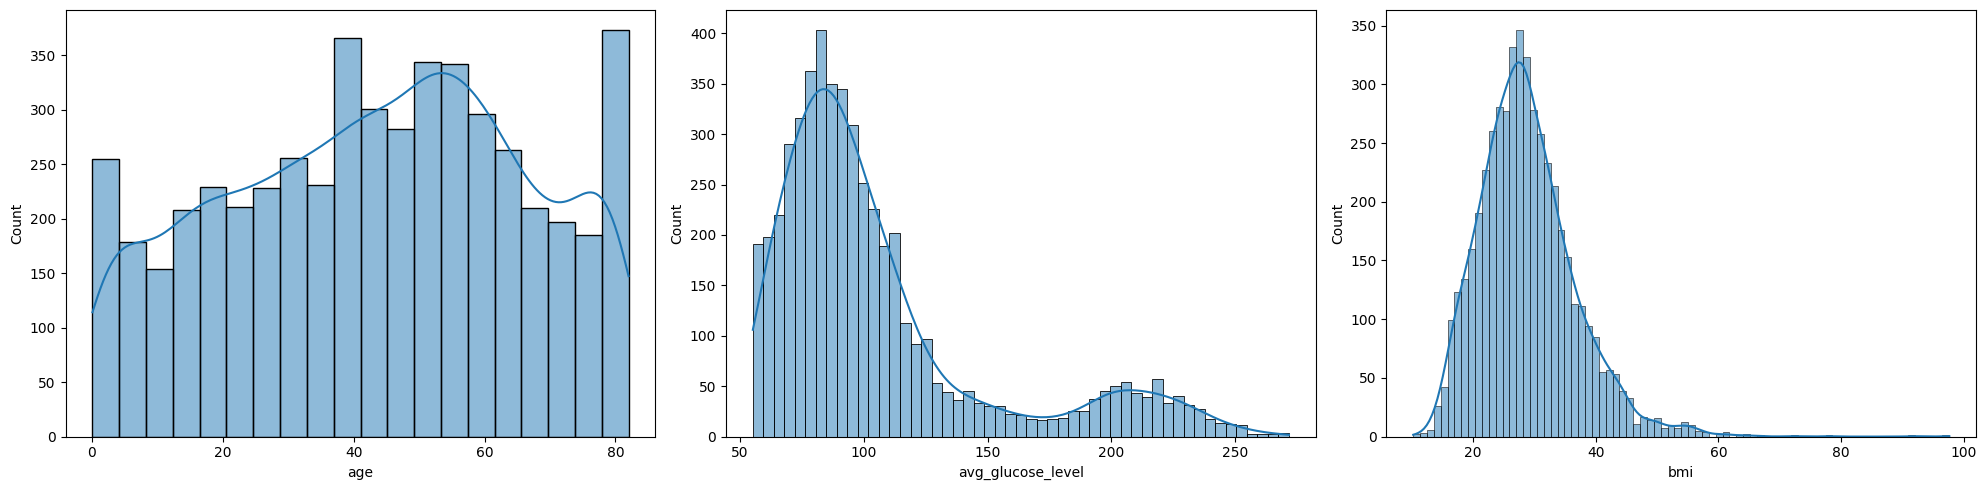

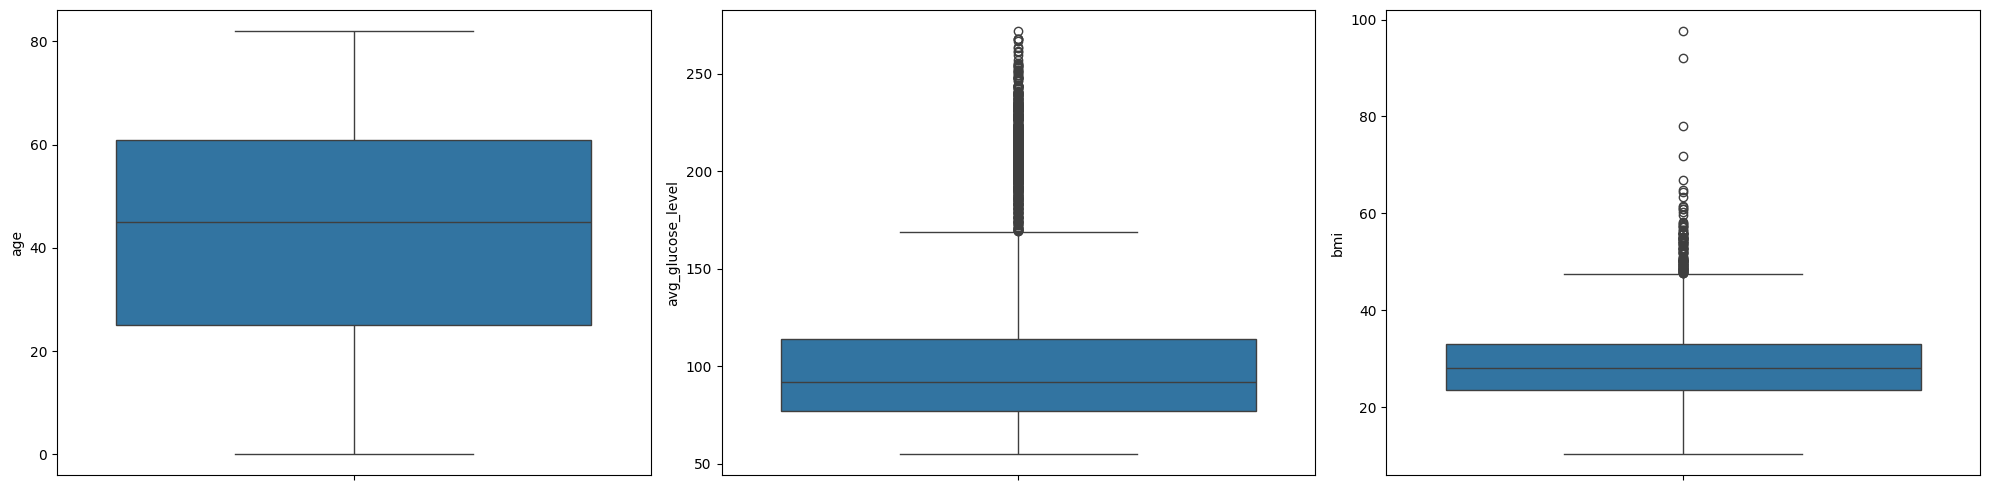

In [ ]:
# List of continuous variables
num_df = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for feature, subplot in zip(num_df, ax.flatten()):
    sns.histplot(df[feature], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for feature, subplot in zip(num_df, ax.flatten()):
    sns.boxplot(df[feature], ax=subplot)

plt.tight_layout()
plt.show()

### Insight:
**age** feature has no outliers

**avg_glucose_level** has lots of outliers and the distribution is right-skewed

**bmi** has some extreme outliers which need to be handled

### Check the label (stroke)

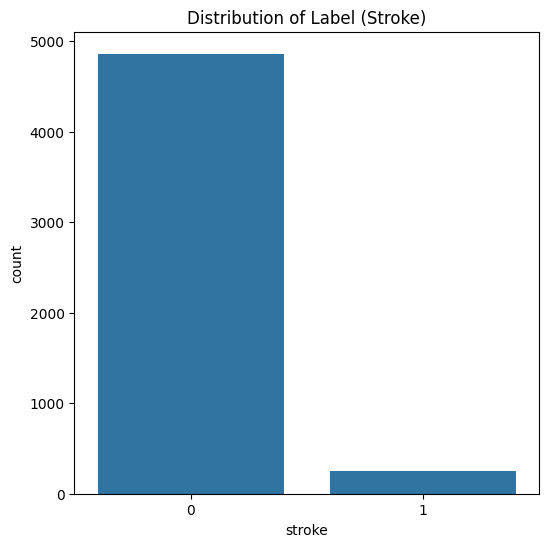

In [ ]:
# Plot the label
plt.figure(figsize=(6, 6))
sns.countplot(x=df['stroke'])
plt.title('Distribution of Label (Stroke)')
plt.show()

### Insight:
The label is imbalanced with more instances of no stroke (0) than stroke (1).

### Check statistics info for categorical features

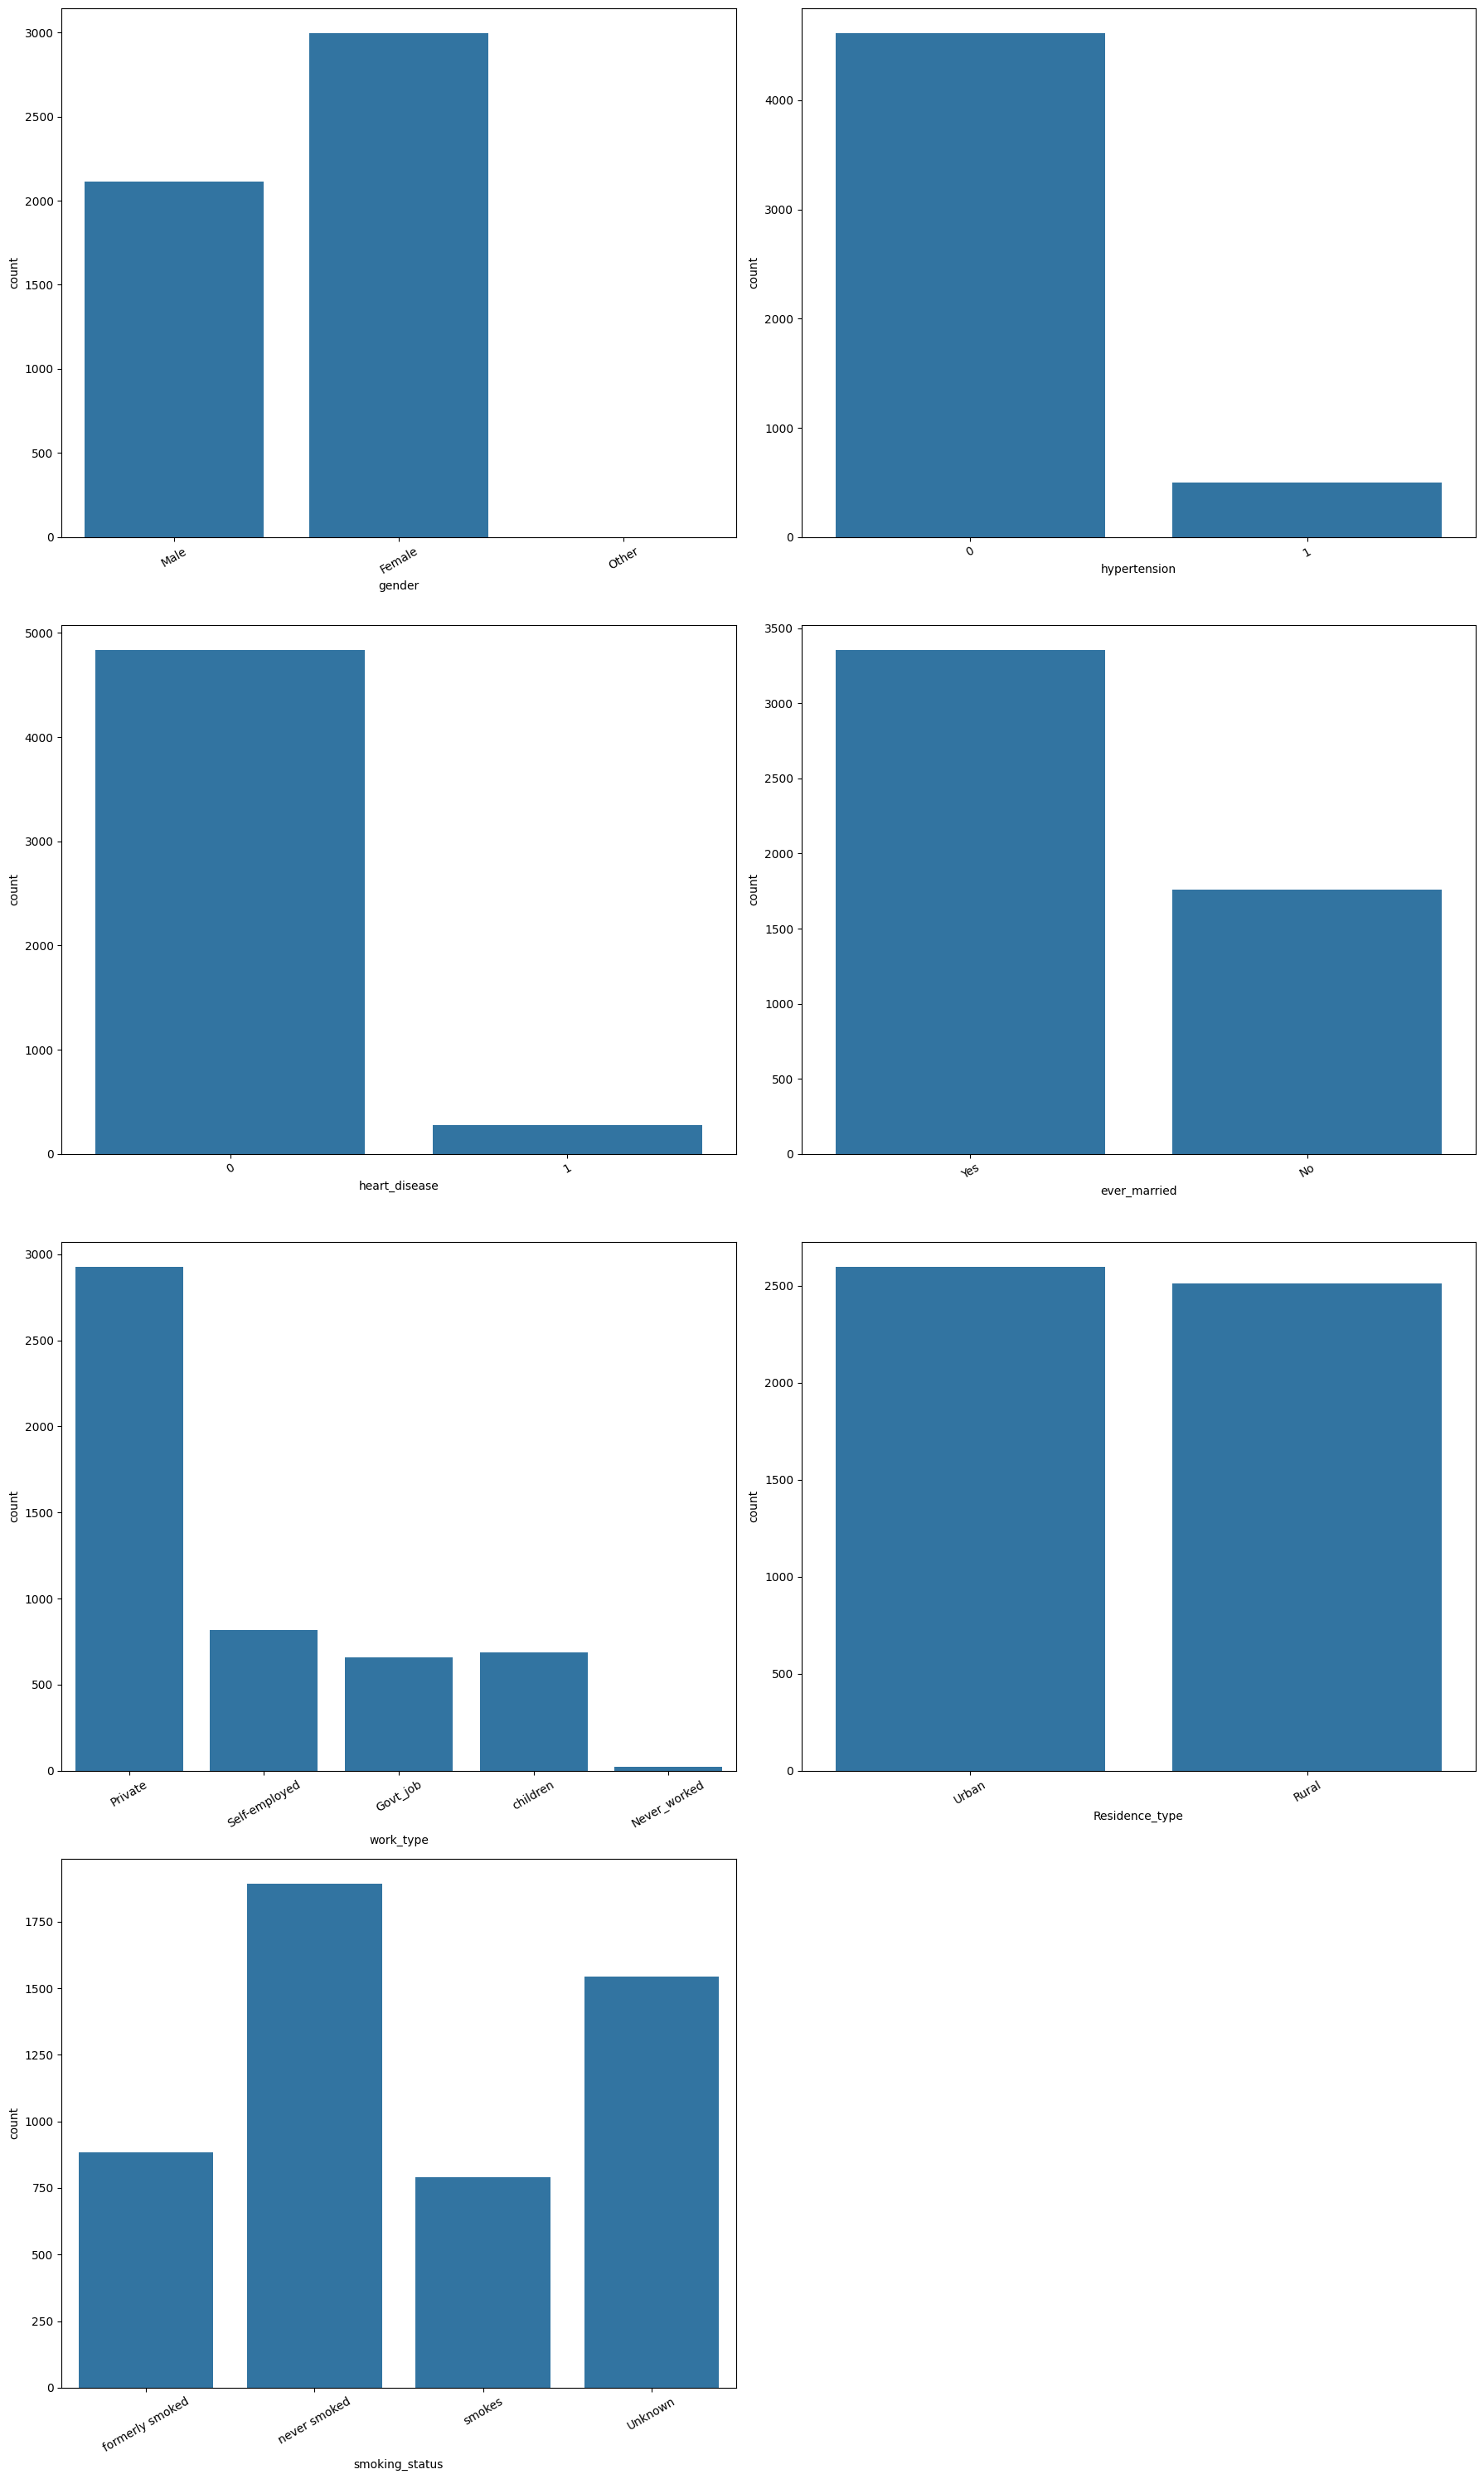

In [ ]:
# List of categorical variables
cat_df = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot graph
fig, ax= plt.subplots(nrows= 4, ncols= 2, figsize= (18,30))
for feature, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(x= feature, data= df, ax= subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

# Delete all empty subplot (if any)
# len(cat_df) = filled subplot, len(ax.flatten()) = total available subplot
for idx in range(len(cat_df), len(ax.flatten())):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()

### Insight:
**gender**: female is slightly greater than male.

**hypertension**: only few patients have hypertension.

**heart_disease**: only few patients have heart disease.

**ever_married**: most of the patients have married.

**work_type**: most of the patients work in private category, while the others are in self-employed, children, goverment, and never work category.

**Residence_type**: the number of patients who live in urban is almost the same as rural

**smoking_status**: most patients have never smoked, while the others remain unknown, formerly smoked, and smokes.


### Check the numerical features against the label

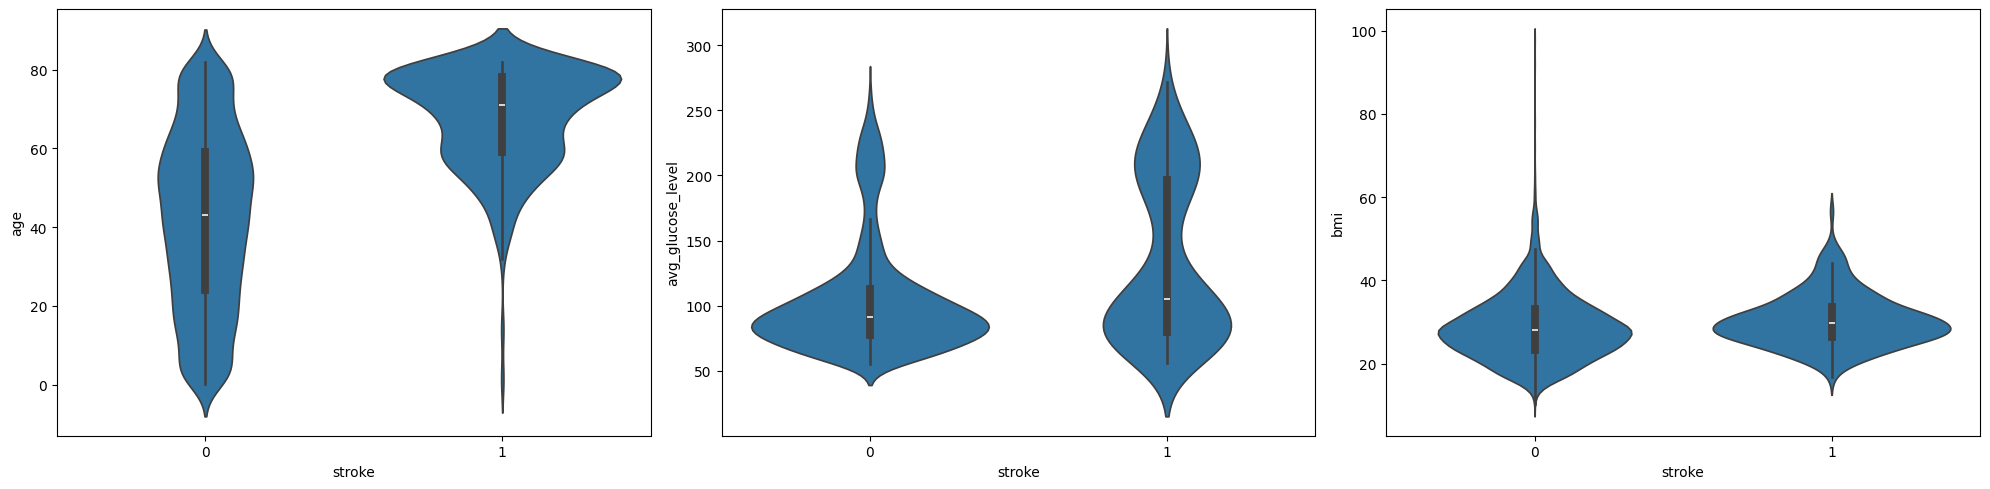

In [ ]:
# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(num_df, axs.flatten()):
    sns.violinplot(x=df['stroke'], y=df[var], ax=subplot)

plt.tight_layout()
plt.show()

### Insight:
**age**: stroke is likely to happen on older patients

**avg_glucose_level**: stroke patients tend to have higher average glucose level than non-stroke patients.

**bmi**: the BMI distributions for stroke and non-stroke patients are quite similar, which could mean that BMI might not be a strong predictor for stroke.

### Check the categorical features against the label

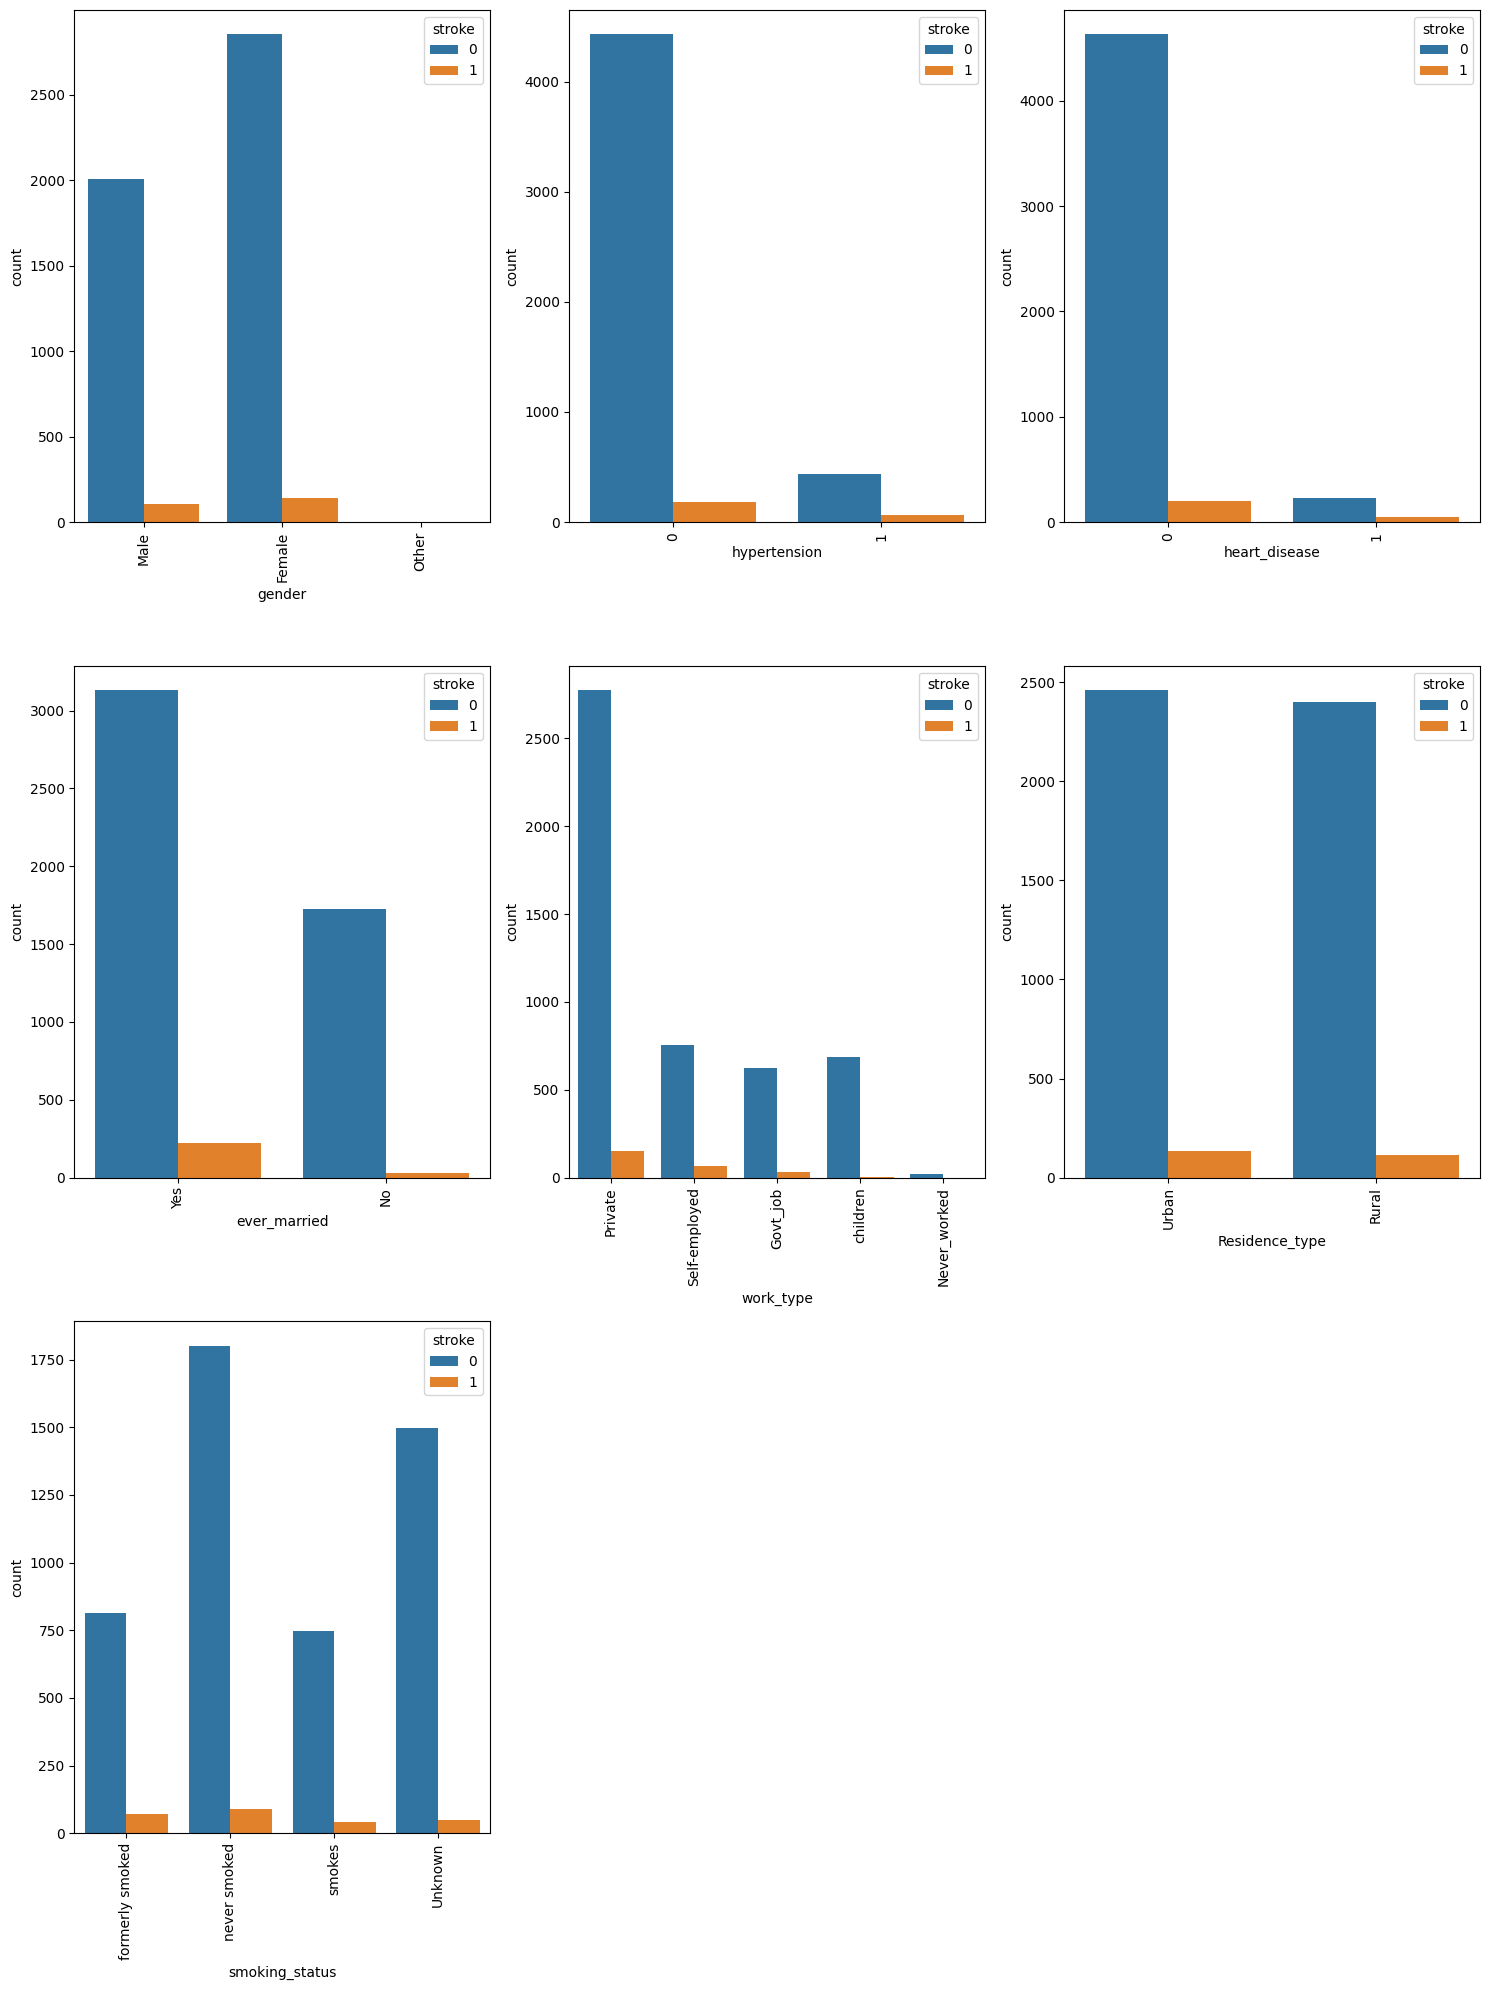

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 20))

for feature, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(x=df[feature], hue=df['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

for idx in range(len(cat_df), len(ax.flatten())):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()

### Insight:
**gender**: both male and female have simillar case of getting stroke.

**hypertension**: patients with hypertension have higher proportion of getting stroke.

**heart_disease**:patients with heart disease have higher proportion of getting stroke.

**ever_married**:patients who have married have higher proportion of getting stroke.

**work_type**: patients who work in private jobs tend to have higher proportion in getting cancer.

**Residence_type**: both urban and rural have simillar case of getting stroke.

**smoking_status**: patients who formerly smoked and smokes have higher proportion of getting stroke than the others.


# Data Preprocessing

### Check missing values

In [ ]:
# Remove id column
df = df.drop('id',axis=1)

df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


### Insight:
BMI has lot of missing values. Since bmi is important, it's better to impute the missing data instead of deleting it.

There are two ways to impute the missing data:
1. Using SimpleImputer with strategy= mean, or
2. Using KNNeighbour.

In [ ]:
# Simple Imputer
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
# imputed_data= imputer.fit_transform(df)

In [ ]:
# KNNeighbour
from sklearn.neighbors import KNeighborsRegressor


def knn_imputer(df, target_feat):
  df= df.copy()

  numeric_df= df.select_dtypes(include=[np.number])
  non_empty_feature= numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

  X_train= numeric_df.loc[numeric_df[target_feat].isna() == False, non_empty_feature]
  y_train= numeric_df.loc[numeric_df[target_feat].isna() == False, target_feat]
  X_test= numeric_df.loc[numeric_df[target_feat].isna() == True, non_empty_feature]

  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  df.loc[df[target_feat].isna() == True, target_feat] = y_pred

  return df

target_feat = [col for col in df.columns if df[col].isnull().sum()!=0]

for col in target_feat:
    df = knn_imputer(df, col)

### Check for duplicate values

In [ ]:
dup = df.duplicated().any()
dup

False

### Handle Outliers

In [ ]:
def find_outliers(feature):
  Q1 = feature.quantile(0.25)
  Q3 = feature.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return ((feature < lower_bound) | (feature > upper_bound)).sum()

outliers = {feature: find_outliers(df[feature]) for feature in ['age', 'avg_glucose_level', 'bmi']}
outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 117}

In [ ]:
# Apply log transformation
df['avg_glucose_level']= np.log(data['avg_glucose_level'])
df['bmi']= np.log(data['bmi'])

print({find_outliers(df[column]) for column in ['avg_glucose_level', 'bmi']})

{48, 380}


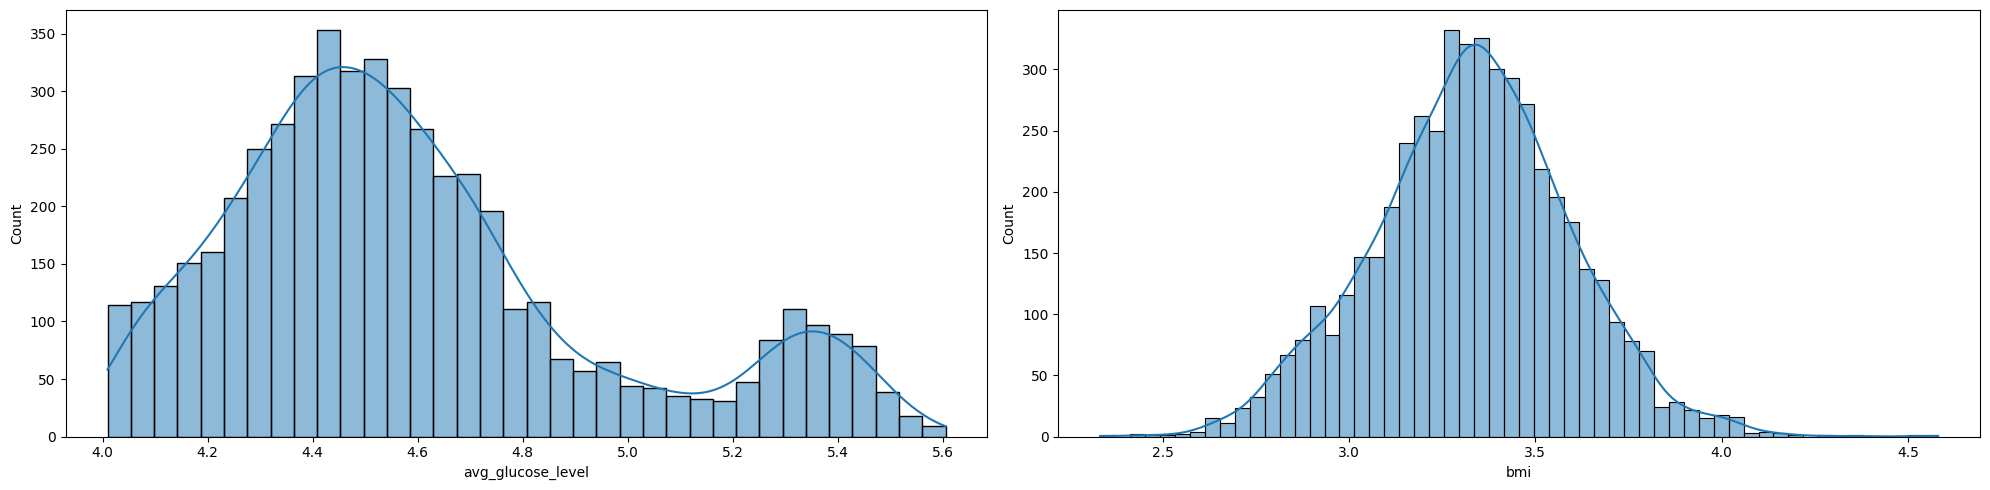

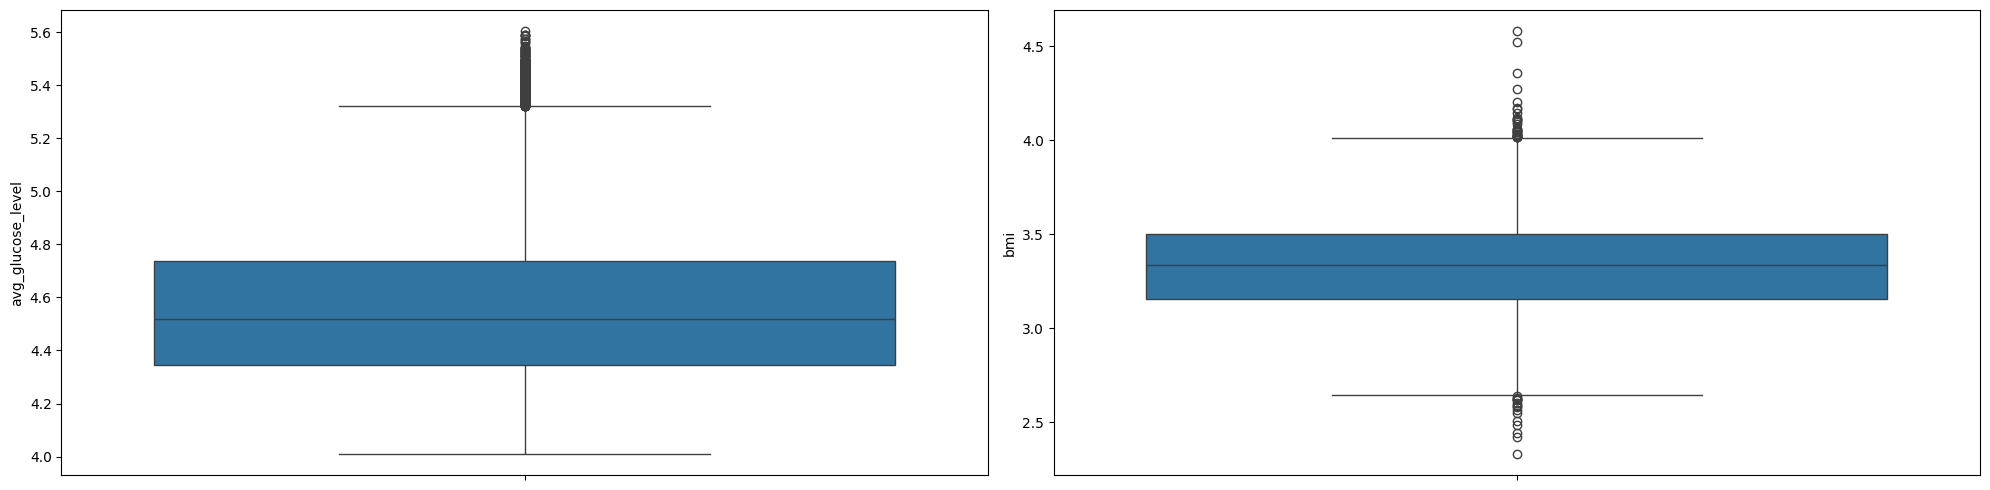

In [ ]:
# Plot the hist and boxplot
num_df_with_outliers= ['avg_glucose_level', 'bmi']

fig, ax= plt.subplots(1, 2, figsize=(20,5))

for feat, subplot in zip (num_df_with_outliers, ax.flatten()):
  sns.histplot(df[feat], kde=True, ax= subplot)

plt.tight_layout()
plt.show()

fig, ax= plt.subplots(1, 2, figsize=(20,5))

for feat, subplot in zip (num_df_with_outliers, ax.flatten()):
  sns.boxplot(df[feat], ax= subplot)

plt.tight_layout()
plt.show()

### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop the row with Other for gender
df = df[data['gender'] != 'Other']

# Convert categorical variables to numerical format using one-hot encoding
encoder = LabelEncoder()
df= df.apply(encoder.fit_transform)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3849,239,1,1
1,0,82,0,0,1,3,0,3587,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3384,217,3,1
4,0,100,1,0,1,3,0,3393,113,2,1


In [ ]:
X= df.drop('stroke', axis=1)
y= df['stroke']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X, y, shuffle=True, test_size=0.1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9452054794520548